# 

# Deskripsi Data

Dataset iris adalah kumpulan data yang sering digunakan dalam analisis statistik dan pembelajaran mesin. Dataset ini terdiri dari 150 sampel dari tiga spesies iris (Iris setosa, Iris virginica, dan Iris versicolor), masing-masing memiliki 50 sampel. Untuk setiap sampel, terdapat empat fitur numerik: SepalLength, SepalWidth, PetalLength, dan PetalWidth, yang diukur dalam sentimeter.

## Penjelasan Fitur

1. Panjang Sepal (sepal length): Ini adalah panjang dari sepal atau bagian yang menonjol dari bunga yang melindungi kelopak. Diukur dalam sentimeter (cm).

2. Lebar Sepal (sepal width): Ini adalah lebar dari sepal bunga iris. Diukur dalam sentimeter (cm).

3. Panjang Kelopak (petal length): Ini adalah panjang dari kelopak atau bagian bunga yang berwarna. Diukur dalam sentimeter (cm).

4. Lebar Kelopak (petal width): Ini adalah lebar dari kelopak bunga iris. Diukur dalam sentimeter (cm).

# mengambil data dari dua sumber

data ini diambil dari mysql yang berisi id, SepalLengthCm dan SepalWidthCm dan Species

In [ ]:
df_1 = _deepnote_execute_sql('SELECT * FROM iris1;', 'SQL_1EBCDE9E_AE53_4FED_98A8_03783A766D52', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,id,SepalLengthCm,SepalWidthCm,Species
0,1,5.1,3.5,Iris-setosa
1,2,4.9,3.0,Iris-setosa
2,3,4.7,3.2,Iris-setosa
3,4,4.6,3.1,Iris-setosa
4,5,5.0,3.6,Iris-setosa
...,...,...,...,...
144,146,6.7,3.0,Iris-virginica
145,147,6.3,2.5,Iris-virginica
146,148,6.5,3.0,Iris-virginica
147,149,6.2,3.4,Iris-virginica


data ini diambil dari postgres yang berisi id, PetalLengthCm dan PetalWidthCm

In [ ]:
df_2 = _deepnote_execute_sql('SELECT "id","PetalLengthCm","PetalWidthCm" FROM public.iris2;', 'SQL_73A37329_FB87_4CE7_9F22_E78051BCC311', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_2

,id,PetalLengthCm,PetalWidthCm
0,1,1.4,0.2
1,2,1.4,0.2
2,3,1.3,0.2
3,4,1.5,0.2
4,5,1.4,0.2
...,...,...,...
145,146,5.2,2.3
146,147,5.0,1.9
147,148,5.2,2.0
148,149,5.4,2.3


In [ ]:
print(df_1)

      id  SepalLengthCm  SepalWidthCm         Species
0      1            5.1           3.5     Iris-setosa
1      2            4.9           3.0     Iris-setosa
2      3            4.7           3.2     Iris-setosa
3      4            4.6           3.1     Iris-setosa
4      5            5.0           3.6     Iris-setosa
..   ...            ...           ...             ...
144  146            6.7           3.0  Iris-virginica
145  147            6.3           2.5  Iris-virginica
146  148            6.5           3.0  Iris-virginica
147  149            6.2           3.4  Iris-virginica
148  150            5.9           3.0  Iris-virginica

[149 rows x 4 columns]


In [ ]:
print(df_2)

      id  PetalLengthCm  PetalWidthCm
0      1            1.4           0.2
1      2            1.4           0.2
2      3            1.3           0.2
3      4            1.5           0.2
4      5            1.4           0.2
..   ...            ...           ...
145  146            5.2           2.3
146  147            5.0           1.9
147  148            5.2           2.0
148  149            5.4           2.3
149  150            5.1           1.8

[150 rows x 3 columns]


# penggabungan dua data

menggabungkan data frame yang dari mysql dan postgres

In [ ]:
import pandas as pd

df_main = pd.merge (df_1,df_2, on = 'id', how='inner')
df_main.head(len(df_main))

,id,SepalLengthCm,SepalWidthCm,Species,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,Iris-setosa,1.4,0.2
1,2,4.9,3.0,Iris-setosa,1.4,0.2
2,3,4.7,3.2,Iris-setosa,1.3,0.2
3,4,4.6,3.1,Iris-setosa,1.5,0.2
4,5,5.0,3.6,Iris-setosa,1.4,0.2
...,...,...,...,...,...,...
144,146,6.7,3.0,Iris-virginica,5.2,2.3
145,147,6.3,2.5,Iris-virginica,5.0,1.9
146,148,6.5,3.0,Iris-virginica,5.2,2.0
147,149,6.2,3.4,Iris-virginica,5.4,2.3


mengatur urutan indeks dengan menggunakan reindex

In [ ]:
df_main = df_main.reindex(columns=['id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])
print(df_main)

      id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
144  146            6.7           3.0            5.2           2.3   
145  147            6.3           2.5            5.0           1.9   
146  148            6.5           3.0            5.2           2.0   
147  149            6.2           3.4            5.4           2.3   
148  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
144  

mengembalikan atau menampilkan ulang data frame df_main biar rapi juga

In [ ]:
df_main.head(len(df_main))

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
144,146,6.7,3.0,5.2,2.3,Iris-virginica
145,147,6.3,2.5,5.0,1.9,Iris-virginica
146,148,6.5,3.0,5.2,2.0,Iris-virginica
147,149,6.2,3.4,5.4,2.3,Iris-virginica


disini saya menampilkan data data yang missing values atau null biar diketahui di id apa aja dan termasuk dalam sepcies apa

In [ ]:
df_3 = _deepnote_execute_sql('SELECT * FROM df_main WHERE SepalLengthCm is null', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_3

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6,NaN,3.9,1.7,0.4,None
1,9,NaN,2.9,1.4,0.2,Iris-setosa
2,71,NaN,3.2,4.8,1.8,Iris-versicolor
3,111,NaN,3.2,5.1,2.0,None
4,119,NaN,2.6,6.9,2.3,Iris-virginica


# cleaning

untuk  tahap ini yaitu menghapus baris kolom yang mempunyai species yang null

In [ ]:
df_cleaned = df_main.dropna(subset=['Species'])
print(df_cleaned)

      id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
144  146            6.7           3.0            5.2           2.3   
145  147            6.3           2.5            5.0           1.9   
146  148            6.5           3.0            5.2           2.0   
147  149            6.2           3.4            5.4           2.3   
148  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
144  

In [ ]:
df_cleaned.head(len(df_cleaned))

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
144,146,6.7,3.0,5.2,2.3,Iris-virginica
145,147,6.3,2.5,5.0,1.9,Iris-virginica
146,148,6.5,3.0,5.2,2.0,Iris-virginica
147,149,6.2,3.4,5.4,2.3,Iris-virginica


# missing value dengan rata rata

disini saya mencari nilai  yang kosong di kolom sepallength dan mencari nilai nya dengan menggunakan metode rata rata sesuai speciesnya

ini species yang setosa

In [ ]:
setosa_df = df_cleaned[df_cleaned['Species'] == 'Iris-setosa']
mean_sepal_length_setosa = setosa_df['SepalLengthCm'].mean()
print(mean_sepal_length_setosa)

5.010416666666667


kemudian nilainya dibulatkan

In [ ]:
mean_sepal_length_setosa_rounded = round(mean_sepal_length_setosa, 1)
print(mean_sepal_length_setosa_rounded)


5.0


ini species versicolor

In [ ]:
versicolor_df = df_cleaned[df_cleaned['Species'] == 'Iris-versicolor']
mean_sepal_length_versicolor = versicolor_df['SepalLengthCm'].mean()
print(mean_sepal_length_versicolor)

5.947916666666667


kemudian nilainya dibulatkan

In [ ]:
mean_sepal_length_versicolor_rounded = round(mean_sepal_length_versicolor, 1)
print(mean_sepal_length_versicolor_rounded)

5.9


ini species virginica

In [ ]:
virginica_df = df_cleaned[df_cleaned['Species'] == 'Iris-virginica']
mean_sepal_length_virginica = virginica_df['SepalLengthCm'].mean()
print(mean_sepal_length_virginica)

6.566666666666666


kemudian nilainya dibulatkan

In [ ]:
mean_sepal_length_virginica_rounded = round(mean_sepal_length_virginica, 1)
print(mean_sepal_length_virginica_rounded)

6.6


disini tahap memasukkan nilai yang sudah dicari menggunakan rata rata sesuai speciesnya

ini yang setosa

In [ ]:
df_cleaned.loc[(df_cleaned['Species'] == 'Iris-setosa') & (df_cleaned['SepalLengthCm'].isnull()), 'SepalLengthCm'] = mean_sepal_length_setosa_rounded
df_cleaned



,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
144,146,6.7,3.0,5.2,2.3,Iris-virginica
145,147,6.3,2.5,5.0,1.9,Iris-virginica
146,148,6.5,3.0,5.2,2.0,Iris-virginica
147,149,6.2,3.4,5.4,2.3,Iris-virginica


ini versicolor

In [ ]:
df_cleaned.loc[(df_cleaned['Species'] == 'Iris-versicolor') & (df_cleaned['SepalLengthCm'].isnull()), 'SepalLengthCm'] = mean_sepal_length_versicolor_rounded
df_cleaned

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
144,146,6.7,3.0,5.2,2.3,Iris-virginica
145,147,6.3,2.5,5.0,1.9,Iris-virginica
146,148,6.5,3.0,5.2,2.0,Iris-virginica
147,149,6.2,3.4,5.4,2.3,Iris-virginica


ini virginica

In [ ]:
df_cleaned.loc[(df_cleaned['Species'] == 'Iris-virginica') & (df_cleaned['SepalLengthCm'].isnull()), 'SepalLengthCm'] = mean_sepal_length_virginica_rounded
df_cleaned

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
144,146,6.7,3.0,5.2,2.3,Iris-virginica
145,147,6.3,2.5,5.0,1.9,Iris-virginica
146,148,6.5,3.0,5.2,2.0,Iris-virginica
147,149,6.2,3.4,5.4,2.3,Iris-virginica


# metode knn

In [ ]:
df_cleaned_knn = df_main.dropna(subset=['Species'])
df_cleaned_knn

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
144,146,6.7,3.0,5.2,2.3,Iris-virginica
145,147,6.3,2.5,5.0,1.9,Iris-virginica
146,148,6.5,3.0,5.2,2.0,Iris-virginica
147,149,6.2,3.4,5.4,2.3,Iris-virginica


disini dilakukan proses pengisian nilai yang kosong menggunakan konsep knn

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df_cleaned_knn['SepalLengthCm'] = imputer.fit_transform(df_cleaned_knn[['SepalLengthCm']]).round(1)

df_cleaned_knn

/tmp/ipykernel_153/1583004780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_knn['SepalLengthCm'] = imputer.fit_transform(df_cleaned_knn[['SepalLengthCm']]).round(1)


,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
144,146,6.7,3.0,5.2,2.3,Iris-virginica
145,147,6.3,2.5,5.0,1.9,Iris-virginica
146,148,6.5,3.0,5.2,2.0,Iris-virginica
147,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df_4 = _deepnote_execute_sql('SELECT * FROM iris', 'SQL_1EBCDE9E_AE53_4FED_98A8_03783A766D52', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_4

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## masukkan data ke tabel baru yang berisi sepallength dari data asli, proses rata2, dan proses knn

In [ ]:
import pymysql

# Mengatur koneksi ke database MySQL
host = '{YOUR_HOST}'
user = '{YOUR_USER}'
password = '{YOUR_PASSWORD}'
database = 'defaultdb'
port = 20051
conn = pymysql.connect(host=host, user=user, password=password, database=database, port=port)

# Nama kolom yang ingin dimasukkan ke dalam tabel
kolom_id = 'id'
kolom_1 = 'SepalLengthCm_asli'
kolom_2 = 'SepalLengthCm_rata2'
kolom_3 = 'SepalLengthCm_knn'

# Nama tabel di database
nama_tabel = 'data_gabung'

# Mendapatkan nilai dari kolom DataFrame
nilai_kolom_2 = df_cleaned['SepalLengthCm']
nilai_kolom_3 = df_cleaned_knn['SepalLengthCm']

# Membuat kursor untuk eksekusi perintah SQL
cursor = conn.cursor()

# Memasukkan nilai ke dalam tabel
for id,nilai_2, nilai_3 in zip( df_cleaned['id'],nilai_kolom_2, nilai_kolom_3):
    if pd.isnull(id):  # Jika Id kosong, gunakan pernyataan INSERT INTO
        query = f"INSERT INTO {nama_tabel}, {kolom_2}), {kolom_3}) VALUES ('{nilai_1}', '{nilai_2}', '{nilai_3}')"
    else:  # Jika Id sudah ada, gunakan pernyataan UPDATE
        query = f"UPDATE {nama_tabel} SET {kolom_2} = '{nilai_2}', {kolom_3} = '{nilai_3}' WHERE {kolom_id} = {id}"
    cursor.execute(query)

# Melakukan commit untuk menyimpan perubahan
conn.commit()

# Menutup koneksi
conn.close()

In [ ]:
df_5 = _deepnote_execute_sql('SELECT * FROM data_gabung', 'SQL_1EBCDE9E_AE53_4FED_98A8_03783A766D52', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_5

,id,SepalLengthCm_asli,SepalLengthCm_rata2,SepalLengthCm_knn
0,1,5.1,5.1,5.1
1,2,4.9,4.9,4.9
2,3,4.7,4.7,4.7
3,4,4.6,4.6,4.6
4,5,5.0,5.0,5.0
...,...,...,...,...
145,146,6.7,6.7,6.7
146,147,6.3,6.3,6.3
147,148,6.5,6.5,6.5
148,149,6.2,6.2,6.2


# Deteksi Outliers (Local Outlier Factor)

## Konsep Local Outlier

Outlier adalah bagian dari data yang sangat berbeda dari sebagian besar data lainnya. Mungkin sulit untuk menentukan apa yang tepat dianggap sebagai outlier, karena bisa bersifat subjektif. Outlier dapat dianggap sebagai bagian data yang sangat rendah atau tinggi, jauh dari rata-rata atau norma dari kumpulan data. Outlier bisa disebabkan oleh kebetulan atau kesalahan dalam pengukuran. Hal ini dapat mempengaruhi hasil analisis data secara keseluruhan, sehingga penting untuk mengidentifikasi dan menghapus outlier dari data. Ada berbagai cara untuk mengidentifikasi outlier, dan tidak ada cara baku yang tepat untuk setiap data. Dalam bagian selanjutnya, akan dibahas 5 cara untuk mendeteksi outlier.

## Menghitung Manual Local Outlier

data contoh dengan tipe numerik 3 fitur , jumlah data 10, K = 3, p=2 (euclidian)

<img src="foto/image-20240321-012506.png" width="" align="left" />

- step 1 hitung jarak antar setiap data dengan euclidean

<img src="foto/image-20240321-001910.png" width="" align="left" />

- step 2 Menentukan k-Nearest Neighbors (k= 3)

<img src="foto/image-20240321-001954.png" width="" align="left" />

- step 3 Menghitung Local Reachability Density (LRD)

- k-distance neighborhood of o, Nk(o) = {o’| 
o’ in D, dist(o, o’) ≤ distk(o)}

<img src="foto/image-20240321-002033.png" width="" align="left" />

- || Nk(o) || means the number of objects in Nk(o)

<img src="foto/image-20240321-002111.png" width="" align="left" />

- Menghitung RD dengan rumus :

<img src="foto/image-20240320-002729.png" width="" align="left" />

<img src="foto/image-20240321-002148.png" width="" align="" />

- Menghitung LRD dengan rumus :

<img src="foto/image-20240320-003001.png" width="" align="left" />

<img src="foto/image-20240321-002215.png" width="" align="" />

- Step 4 calculate all the LOFk(o) 

<img src="foto/image-20240321-002246.png" width="" align="" />

- Mengurutkan nilai outliernya 

Sort all the LOFk(o)	
LOF3(e) =  78.888	
LOF3(j) = 37,172	
LOF3(f) =  21.197	
LOF3(c) = 15.221	
LOF3(h) = 12.747	
LOF3(i) = 10,186	
LOF3(g) = 9.378	
LOF3(b) = 8.828	
LOF3(a) = 7.736	
LOF3(d) = 7.392	


## Menghitung outlier menggunakan python(scikit learn)

Label -1 menunjukkan bahwa sampel dianggap sebagai outlier, sementara label 1 menunjukkan bahwa sampel dianggap sebagai data normal.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

X = [
    (0,0,1),
    (2,1,2),
    (0,3,3),
    (1,2,2),
    (3,2,2),
    (1,1,1),
    (2,2,2),
    (0,0,0),
    (0,1,2),
    (3,3,3)

]

lof = LocalOutlierFactor(n_neighbors=3, contamination=0.1)

y_pred = lof.fit_predict(X)

print("Predicted table:", y_pred)
print("Negative LOF scores:", -lof.negative_outlier_factor_)  # Ubah tanda negatif untuk mendapatkan nilai LOF positif

Predicted table: [ 1  1 -1  1  1  1  1  1  1  1]
Negative LOF scores: [1.10945798 0.89650378 1.56719796 0.93491262 1.09532716 1.0180369
 1.029565   1.20000458 0.98197218 1.3103592 ]


In [ ]:
df_6 = _deepnote_execute_sql('SELECT * FROM iris\n\n', 'SQL_1EBCDE9E_AE53_4FED_98A8_03783A766D52', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_6

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df_7 = _deepnote_execute_sql('SELECT * FROM data_gabung', 'SQL_1EBCDE9E_AE53_4FED_98A8_03783A766D52', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_7

,id,SepalLengthCm_asli,SepalLengthCm_rata2,SepalLengthCm_knn
0,1,5.1,5.1,5.1
1,2,4.9,4.9,4.9
2,3,4.7,4.7,4.7
3,4,4.6,4.6,4.6
4,5,5.0,5.0,5.0
...,...,...,...,...
145,146,6.7,6.7,6.7
146,147,6.3,6.3,6.3
147,148,6.5,6.5,6.5
148,149,6.2,6.2,6.2


In [ ]:
df_8 = _deepnote_execute_sql('CREATE TABLE baru AS SELECT * FROM df_6;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_8

In [ ]:
df_9 = _deepnote_execute_sql('SELECT * FROM baru', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_9

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df_10 = _deepnote_execute_sql('SELECT id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm FROM baru;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_10

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


## Implementasi pada data iris

Label -1 menunjukkan bahwa sampel dianggap sebagai outlier, sementara label 1 menunjukkan bahwa sampel dianggap sebagai data normal.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

X = df_10.values  

lof = LocalOutlierFactor(n_neighbors=3, contamination=0.1)

y_pred = lof.fit_predict(X)

print("Predicted labels:", y_pred)
print("Negative LOF scores:", -lof.negative_outlier_factor_)

Predicted labels: [-1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1]
Negative LOF scores: [1.05691948 1.05691948 1.04980109 0.90379368 1.00167035 1.00642009
 1.00114192 0.99070638 0.98543092 1.02049365 0.98142982 1.0191048
 1.00284917 0.99839384 1.01448818 1.01055877 1.0043803  0.99140232
 0.99628916 0.99755626 0.98475656 1.02010885 1.00404429 1.02064905
 0.99185454 0.98762232 1.00083221 0.99657961 1.00513263 0.99693677
 1.00297073 1.01923753 1.01713433 1.0166534  0.9975308  1.0036038
 0.98070888 1.01257991 0.9747014  0.99198208 1.00438609 1.02022638
 1.02104072 0.99743135 1.00537838 0.

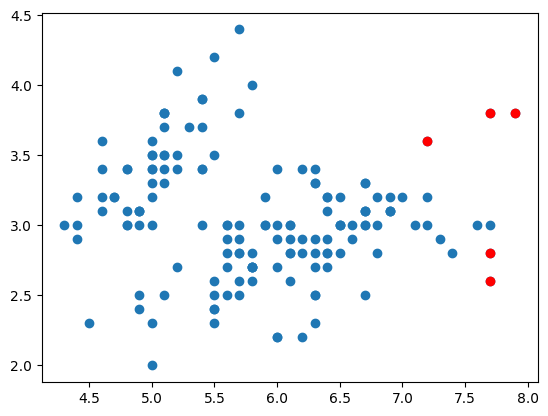

In [ ]:
import pymysql
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

host = '{YOUR_HOST}'
user = '{YOUR_USER}'
password = '{YOUR_PASSWORD}'
database = 'defaultdb'
port = 20051
conn = pymysql.connect(host=host, user=user, password=password, database=database, port=port)

# Membaca data dari database menggunakan Pandas
query = "SELECT SepalLengthCm, SepalWidthCm FROM iris"
cursor = conn.cursor()
cursor.execute(query)
rows = cursor.fetchall()
x = [[row[0], row[1]] for row in rows]

# Menutup koneksi ke database
conn.close()

# Membuat model LOF
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.03)

# Melakukan prediksi outlier
y_pred = lof.fit_predict(x)

# Menampilkan data dengan outlier yang diidentifikasi
outlier_indices = [i for i, label in enumerate(y_pred) if label == -1]
values = [x[i] for i in outlier_indices]

plt.scatter([point[0] for point in x], [point[1] for point in x])
plt.scatter([point[0] for point in values], [point[1] for point in values], color='r')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=116d6c0e-dd40-449a-a6c6-9c3c8922170c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>